In [1]:
!pip install easyocr
# !pip install kornia
# !pip install pytorch
from glob import glob
# import kornia as k
import torchvision
import torchvision.transforms as t
import numpy as np
import torch
import sys
import cv2
import random
from google.colab.patches import cv2_imshow
from PIL import Image
from matplotlib import pyplot as pl
import os
import pandas as pd
import easyocr

     |████████████████████████████████| 70.8 MB 12 kB/s 
     |████████████████████████████████| 47.6 MB 1.7 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Поворот изображений

In [ ]:
count_rot = 11
for img in glob("/content/drive/MyDrive/crops-wagon/*.jpg"):
  img = Image.open(img)

  transf = t.RandomRotation(degrees =(10, 12))

  img = transf(img)

  # def save(path, tensor):
  #     image = torchvision.utils.make_grid(tensor, nrow=2)
  #     image = k.utils.tensor_to_image(image)
  #     im = Image.fromarray(np.uint8(image*255))
  #     im.save(path)

  img.save(f"/content/drive/MyDrive/crops-wagon/rotated_crops/rotated_{count_rot}.jpg")
  count_rot += 1

# img = Image.open("/content/drive/MyDrive/crops-wagon/Desktop-2022_04_01---16_40_13_06_Trim_mp4-108_jpg.rf.2edea3f276452e492ce6413f1b7b2c95.jpg")

# pl.imshow(img)
# pl.show()

## Изменение перспективы

In [ ]:
count_persp = 0
for img in glob("/content/drive/MyDrive/crops-wagon/*.jpg"):
  img = Image.open(img)

  transf = t.RandomPerspective(0.5, 1)
  img = transf(img)

  img.save(f"/content/drive/MyDrive/crops-wagon/crops_with_edited_perspective/persp_{count_persp}.jpg")

  count_persp += 1

In [ ]:
# !pip uninstall opencv-python-headless
!pip uninstall -qy opencv-python-headless

!pip uninstall -qy opencv-python
%pip install opencv-python

%pip install opencv-python-headless==4.5.2.52

%pip install opencv-python


  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached opencv_python_headless-4.5.2.52-cp37-cp37m-manylinux2014_x86_64.whl (38.2 MB)


In [ ]:
import cv2
import os

count_aug = 0

path_to_folder = "/content/drive/MyDrive/project/crops/aug_mini/" ## папка с изображениями для аугментации
output_folder = "/content/drive/MyDrive/project/crops/augmented_canny/" ## папка с результатом аугментации
img_names = os.listdir(path_to_folder)


if not os.path.exists(output_folder):
    os.makedirs(output_folder)
for i in img_names:
    print(i)
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (1, 1), 3)
    img = cv2.addWeighted(img, 1.2, img, 2, -90)
    img = cv2.Canny(img, 70, 120)
    cv2.imwrite(f"/content/drive/MyDrive/project/crops/augmented_canny/persp_{count_aug}.jpg", img)
    count_aug += 1

Копия colorized-10_------_-23C6-64C_mp4-99_jpg.rf.ebef97bd3ae7c4d5ea179161b204ad81.jpg
Копия colorized-10_Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.3d38a671625181d9ac40dab9d20c479a.jpg
Копия colorized-10_Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.3d38a671625181d9ac40dab9d20c479a2.jpg
colorized-10_------_-23C6-64C_mp4-99_jpg.rf.eec425233dc5e8695e4bfcb04c42e05f.jpg
colorized-10_------_-23C6-64C_mp4-55_jpg.rf.7c1bce3ecc4f772921c1a8723104baf1.jpg
Копия colorized-10_------_-23C6-64C_mp4-55_jpg.rf.749400ae9bce11416923d52d1b18c7b1.jpg
Копия colorized-10_------_-23C6-64C_mp4-68_jpg.rf.777c1f0dc85a6c245d99ca4bea0f1387.jpg
Копия colorized-10_------_-23C6-64C_mp4-68_jpg.rf.caf90c18d97964f465bc203ba5cb1cd8.jpg
Копия colorized-10_------_-23C6-64C_mp4-50_jpg.rf.f189bbd712630ffb20116ebfc7351262.jpg
Копия colorized-10_------_-23C6-64C_mp4-55_jpg.rf.3f04dcfc55a3fda3a125819ad9a42ff2.jpg


In [ ]:
img = cv2.imread("/content/drive/MyDrive/project/crops/Augmentation/colorized-10_------_-23C6-64C_mp4-50_jpg.rf.f189bbd712630ffb20116ebfc7351262.jpg")

scale_percent = 150  
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

dim = (width, height)
img = cv2.resize(img, dim, interpolation=cv2.INTER_LANCZOS4)  

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (1, 1), 3)
img = cv2.addWeighted(img, 1.2, img, 2, -90)
img = cv2.Canny(img, 70, 120)
cv2.imwrite("/content/drive/MyDrive/project/crops/augmented_canny/per.jpg", img)

True

In [ ]:
!pip install easyocr
import random
import torchvision
import torchvision.transforms as t
import math

from PIL import Image, ImageOps
import os
import numpy
import cv2
import  easyocr

!pip uninstall -y opencv-python
!pip uninstall -qy opencv-python-headless
!pip install -q opencv-python
!pip install -q opencv-python-headless==4.5.2.52

!pip uninstall imgaug

!pip install imgaug==0.2.6

!pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio
!pip install --no-dependencies imgaug

!pip install imgaug

In [ ]:
import random
import torchvision
import torchvision.transforms as t
import math

from PIL import Image, ImageOps
import os
import numpy

path_to_folder = "/content/drive/MyDrive/crops-wagon" ## папка с изображениями для аугментации
output_folder = "/content/drive/MyDrive/Pictures/EasyOCR_detections" ## папка с результатом аугментации
img_names = os.listdir(path_to_folder)


if not os.path.exists(output_folder):
    os.makedirs(output_folder)
def rotate(path_to_folder, img_name, output_folder,i):
    
    im = Image.open(path_to_folder + img_name)
    reader = easyocr.Reader(['en'])
    result = reader.readtext(im, detail=0)
    if len(result)>6:
        im.rotate(i).save(output_folder+"rotate_"+str(i)+"_"+img_name, "JPEG") ## 50 - это значение поворота картинки
        
        name = "rotate_"+str(i)+"_"+img_name
        img_cv2 = cv2.imread(f"{output_folder}{name}")
        print(f"{output_folder}{name}")
        filters(img_cv2, img_name)    
        gray(path_to_folder, img, output_folder,i)
        colorize(path_to_folder, img_name, output_folder,i)
        invert (path_to_folder, img_name, output_folder,i)
        solarize(path_to_folder, img_name, output_folder,i)
        posterize(path_to_folder, img_name, output_folder,i)
        deform(path_to_folder, img_name, output_folder,i)
        perspective(path_to_folder, img_name, output_folder,i)

def gray (path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    im = ImageOps.grayscale(im)
    im.save(output_folder + "gray"+str(i)+"_" + img_name, "JPEG")
    name = "gray"+str(i)+"_" + img_name
    img_cv2 = cv2.imread(f"{output_folder}{name}")
    filters(img_cv2, img_name)

    
def colorize(path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    try:
        im = ImageOps.autocontrast(im)
        im.save(output_folder + "colorized"+str(i)+"_" + img_name, "JPEG")
        name = "colorized"+str(i)+"_" + img_name
        img_cv2 = cv2.imread(f"{output_folder}{name}")
        filters(img_cv2, img_name)
        
    except BaseException:
        pass
    
def invert (path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    im = ImageOps.invert(im)
    im.save(output_folder + "invert"+str(i)+"_" + img_name, "JPEG")
    name = "invert"+str(i)+"_" + img_name
    img_cv2 = cv2.imread(f"{output_folder}{name}")
    filters(img_cv2, img_name)

    
def solarize(path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    im = ImageOps.solarize(im)
    im.save(output_folder + "solarsize"+str(i)+"_" + img_name, "JPEG")
    name = "solarsize"+str(i)+"_" + img_name
    img_cv2 = cv2.imread(f"{output_folder}{name}")
    filters(img_cv2, img_name)

    
def posterize(path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    im = ImageOps.posterize(im,random.randint(1,8))
    im.save(output_folder + "solarsize"+str(i)+"_" + img_name, "JPEG")
    name = "solarsize"+str(i)+"_" + img_name
    img_cv2 = cv2.imread(f"{output_folder}{name}")
    filters(img_cv2, img_name)

def deform(path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    im = ImageOps.deform(im,wave)
    im.save(output_folder + "deform"+str(i)+"_" + img_name, "JPEG")
    name =  "deform"+str(i)+"_" + img_name
    img_cv2 = cv2.imread(f"{output_folder}{name}")
    filters(img_cv2, img_name)
    
def perspective(path_to_folder, img_name, output_folder,i):
    im = Image.open(path_to_folder + img_name)
    im = im.rotate(i)
    im = ImageOps.scale(im, 2)
    transf = t.RandomPerspective(0.5, 1)
    im = transf(im)
    im.save(output_folder + "perspective"+str(i)+"_" + img_name, "JPEG")
    name = "perspective"+str(i)+"_" + img_name
    img_cv2 = cv2.imread(f"{output_folder}{name}")
    filters(img_cv2, img_name)


In [ ]:
import shutil
destination_path = "/content/drive/MyDrive/project/Pictures/EasyOCR_detections/"
for img in glob("/content/drive/MyDrive/project/Pictures/*.jpg"):
  new_location = shutil.move(img, destination_path)
  

In [ ]:
d2 = pd.read_csv('/content/drive/MyDrive/project/Pictures/Data/easy_osr_detection_data/project_names.csv')
df2 = pd.DataFrame(d2)

for img in glob("/content/drive/MyDrive/project/Pictures/aug_canny/*.jpg"):
    im = Image.open(img)
    reader = easyocr.Reader(['en'])
    result = reader.readtext(im, detail=0)
    count = 0
    if result != []:
      res = result[0]
      for i in res:
        if i.isdigit() == True:
          count += 1
      if count == len(res):
      #df2.loc[len(df2.index)] = [img, res]
        new_row = [img, res]
        df2.append(pd.Series(new_row, index=df2.columns[:len(new_row)]), ignore_index=True)

df2

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
pics = []
for i in glob("/content/drive/MyDrive/crops-wagon/*.jpg"):
  pics.append(i)
  break
img = cv2.imread(pics[0])
cv2_imshow(img)

# img = glob("/content/drive/MyDrive/EasyOCR_detections/EasyOCR_detectionscolorized30_Desktop-2022_04_01---17_08_59_09_mp4-58_jpg.rf.93a16c837d564adc86affe896db7809b2.jpg")[0]
# img1 = cv2.imread(img)
# cv2_imshow(img1)

In [ ]:
import pandas as pd
import time

d1 = pd.read_csv('/content/drive/MyDrive/project/Pictures/Data/easy_osr_detection_data/project_names.csv')

df1 = {"filename":pd.Series([]), "number":pd.Series([]), "accuracy":pd.Series([]), "time":pd.Series([])}
df1 = pd.DataFrame(df1)

index1 = 0
glob_mas = glob("/content/drive/MyDrive/EasyOCR_detections/*.jpg")
len_glob_mas = glob_mas[0:10087]
for img in glob_mas[0:10087]:
    im = Image.open(img)
    tic = time.time()
    reader = easyocr.Reader(['en'])
    result = reader.readtext(im, detail=1)
    tac = time.time()
    img_time = tac-tic
    count = 0
    print(result)
    if result != []:
      acc = result[0][2] 
      res = result[0][1]
      for i in res:
        if i.isdigit() == True:
          count += 1
      if count > 6:
      #df2.loc[len(df2.index)] = [img, res]
        new_row = [img, res]
        print(new_row)
        #df2.append(pd.Series(new_row, index=df2.columns[:len(new_row)]), ignore_index=True)
        df1.loc[len(df1.index)] = [img, res, acc, img_time]
        index1 += 1
        
    df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
df1

,filename,number,accuracy,time


In [ ]:
df1.to_csv("/content/drive/MyDrive/Data_easyocr/project_names_1.csv")

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.3d38a671625181d9ac40dab9d20c479a.jpg
Img number:  1

Result:  53601496
Correctness percentage: 62.5


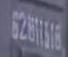

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/------_-23C6-64C_mp4-50_jpg.rf.f189bbd712630ffb20116ebfc7351262.jpg
Img number:  2

Result:  OL
Correctness percentage: 0


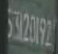

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/------_-23C6-64C_mp4-99_jpg.rf.a39c36946b0931a8ee2909755a4726d2.jpg
Img number:  3

Result:  Mur
Correctness percentage: 0


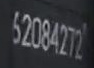

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/------_-23C6-64C_mp4-55_jpg.rf.749400ae9bce11416923d52d1b18c7b1.jpg
Img number:  4

Result:  5208421
Correctness percentage: 62.5


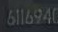

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.3d38a671625181d9ac40dab9d20c479a2.jpg
Img number:  5

Result:  6ls %
Correctness percentage: 12.5


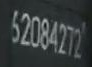

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/------_-23C6-64C_mp4-55_jpg.rf.3f04dcfc55a3fda3a125819ad9a42ff2.jpg
Img number:  6

Result:  '5208421
Correctness percentage: 62.5


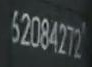

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/------_-23C6-64C_mp4-55_jpg.rf.7c1bce3ecc4f772921c1a8723104baf1.jpg
Img number:  7

Result:  '5208421
Correctness percentage: 62.5


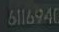

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.cb8a63edd3d069a11d7c450a47f451262.jpg
Img number:  8

Result:  Ua
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-102_jpg.rf.ffe22e2e922115bd6334706d3819cc542.jpg
Img number:  9

Result:  "51072429'
Correctness percentage: 75


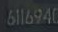

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.610a260e5f241ac74aecf62cbb4334a72.jpg
Img number:  10

Result:  6ls 4
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-102_jpg.rf.edf71f8cd862566e7e47d6e613f51cff2.jpg
Img number:  11

Result:  "51072429'
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.610a260e5f241ac74aecf62cbb4334a7.jpg
Img number:  12

Result:  556496
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-0_jpg.rf.cb8a63edd3d069a11d7c450a47f45126.jpg
Img number:  13

Result:  5746496
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-102_jpg.rf.55c5e4c598bce391796216d817ea223d2.jpg
Img number:  14

Result:  "51072429'
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-23_jpg.rf.13b46f4796451da86fe5f5fb5833406f2.jpg
Img number:  15

Result:  307
Correctness percentage: 12.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-15_jpg.rf.ed31d334fd2c2d863bbf641d18cae8022.jpg
Img number:  16

Result:  Svin"
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-13_jpg.rf.0e20c9710b8c7a2fdc949f3ba2aa12eb2.jpg
Img number:  17

Result:  4503560"
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-13_jpg.rf.62e8271c23d06a6028f3f342f12779692.jpg
Img number:  18

Result:  x50J_D,0e
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-17_jpg.rf.25784d2ecc60b766dfe370ff2bd5d5132.jpg
Img number:  19

Result:  "582 89547
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-15_jpg.rf.ed31d334fd2c2d863bbf641d18cae802.jpg
Img number:  20

Result:  59291547
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-23_jpg.rf.13b46f4796451da86fe5f5fb5833406f.jpg
Img number:  21

Result:  Kentee
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-17_jpg.rf.8e97eec6dbd6e90d4410acc26782267a2.jpg
Img number:  22

Result:  4582,09547
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-17_jpg.rf.066afbfa0db6cab21227d37c1dc1d1ee2.jpg
Img number:  23

Result:  S15al
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-20_jpg.rf.5447c6a545301cd3d541e64db5b863f92.jpg
Img number:  24

Result:  '582,07547
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-20_jpg.rf.8ef14d2052b0c547527d153ceec0cc492.jpg
Img number:  25

Result:  582 07547
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-20_jpg.rf.ae2f39d51d29a3e43d76afbd4fe9ef852.jpg
Img number:  26

Result:  '582 07547
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-23_jpg.rf.e429f55ad691e69c84259127b9804bfe2.jpg
Img number:  27

Result:  3u
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-28_jpg.rf.6ac6b012ddb98c1444832d1dd3d95a27.jpg
Img number:  28
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-28_jpg.rf.3350cf6c3678cc1463da053cd3faf23d2.jpg
Img number:  29

Result:  75762747
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-29_jpg.rf.b3c88dbbc5de758b2e74cc606a61111d2.jpg
Img number:  30

Result:  0/62747
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-27_jpg.rf.814d3478848422bdfda2aa1ea57baf712.jpg
Img number:  31

Result:  78782947
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-25_jpg.rf.42de63bac416f5426734ef46de135a7f2.jpg
Img number:  32

Result:  78762947
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-30_jpg.rf.8d07c1151b8671456f9302343037a7d5.jpg
Img number:  33

Result:  (54762216
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-25_jpg.rf.ae0f5d296bacc6d7c24d3d2a0d3621732.jpg
Img number:  34

Result:  78762947
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-29_jpg.rf.57545157e2b77ef72ad1484db9c573352.jpg
Img number:  35

Result:  0/62747
Correctness percentage: 50


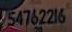

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-27_jpg.rf.3a6fb73b133718cc6192f833e4c5f9c3.jpg
Img number:  36

Result:  164762216
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-28_jpg.rf.3350cf6c3678cc1463da053cd3faf23d.jpg
Img number:  37
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-27_jpg.rf.814d3478848422bdfda2aa1ea57baf71.jpg
Img number:  38

Result:  154762216
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-30_jpg.rf.f5cc09fe22d0401c65b204ea20f9c9eb.jpg
Img number:  39

Result:  (54762216
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-28_jpg.rf.6ac6b012ddb98c1444832d1dd3d95a272.jpg
Img number:  40

Result:  575762747
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-27_jpg.rf.762ec517dfb334edfabc1cd4506009ac2.jpg
Img number:  41

Result:  78782947
Correctness percentage: 75


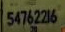

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-29_jpg.rf.ddc20a079632e208c602591d320c2961.jpg
Img number:  42

Result:  (54762216
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-28_jpg.rf.ff438da9df27a74560819b890c12cb57.jpg
Img number:  43
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-23_jpg.rf.8d436468c187fb18716a0a8f38f200ff2.jpg
Img number:  44

Result:  307
Correctness percentage: 12.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-25_jpg.rf.a17c16153222eb6fab24a354202d00062.jpg
Img number:  45

Result:  78762947
Correctness percentage: 87.5


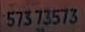

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-33_jpg.rf.a284fe28846ef85b5ae3dc3e3e5a06f4.jpg
Img number:  46

Result:  57570573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-23_jpg.rf.e429f55ad691e69c84259127b9804bfe.jpg
Img number:  47
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-27_jpg.rf.762ec517dfb334edfabc1cd4506009ac.jpg
Img number:  48

Result:  134762216
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-30_jpg.rf.4301822d4d3e0d13cb3fe1038b149bf9.jpg
Img number:  49

Result:  [54762216
Correctness percentage: 87.5


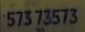

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-33_jpg.rf.ecb7f8ccd0a6b541128e8e3e9ebf7f53.jpg
Img number:  50

Result:  575,73573
Correctness percentage: 75


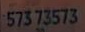

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-33_jpg.rf.08a54866f6fcb52ee93e2d88757715f2.jpg
Img number:  51

Result:  57572573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-27_jpg.rf.3a6fb73b133718cc6192f833e4c5f9c32.jpg
Img number:  52

Result:  1783782947
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-28_jpg.rf.ff438da9df27a74560819b890c12cb572.jpg
Img number:  53

Result:  78762747
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-35_jpg.rf.c8f69320239bc18fa86980bc177da7222.jpg
Img number:  54
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-38_jpg.rf.2af971de37349d5b15b1f06212d4d42f2.jpg
Img number:  55

Result:  (snkzu
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-34_jpg.rf.10f93ac9872fa52bddacb06bc3733a612.jpg
Img number:  56

Result:  J4
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-41_jpg.rf.0fe13f5e2c5dc32a77f016f15544bc51.jpg
Img number:  57

Result:  eniu
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-36_jpg.rf.77ae315dcea041c209c6ae510a6396a5.jpg
Img number:  58

Result:  1575,72573
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-34_jpg.rf.3abda17598722b6acb802e2aace17e692.jpg
Img number:  59

Result:  V
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-38_jpg.rf.0bba9f80d0e2dc9e51d54a7e61c770a92.jpg
Img number:  60
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-36_jpg.rf.ed99f6ebbd81527409498e7b1a0bc016.jpg
Img number:  61

Result:  573,72573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-39_jpg.rf.b5729da7640c687cc08abb2cc6fd06f92.jpg
Img number:  62

Result:  Eenkil
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-35_jpg.rf.39c8a9e80d0c9dae6556c36db7e3916f2.jpg
Img number:  63
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-41_jpg.rf.e7ee2bad1e115455f873662188fb506d2.jpg
Img number:  64

Result:  157471573 
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-41_jpg.rf.0fe13f5e2c5dc32a77f016f15544bc512.jpg
Img number:  65

Result:  157471573 
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-37_jpg.rf.3f111fc0a32471ea0b5a66d67e2f4f4f2.jpg
Img number:  66

Result:  6575 73573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-37_jpg.rf.91a7df0e3691c718f7b166687da85e462.jpg
Img number:  67

Result:  (575 7157
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-39_jpg.rf.e708452fb0ffddf094ddcbf81e810ee42.jpg
Img number:  68

Result:  (5873573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-38_jpg.rf.cf14033ff5bd21f3ca354f7ba24714b62.jpg
Img number:  69

Result:  [5nkzd
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-41_jpg.rf.e7ee2bad1e115455f873662188fb506d.jpg
Img number:  70

Result:  ee
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-36_jpg.rf.54b6b060c1b99603cc83a6af09a16840.jpg
Img number:  71

Result:  575,73573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-37_jpg.rf.1ea05fd8fb74bb1223a6f955337d3120.jpg
Img number:  72

Result:  (snuzn
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-35_jpg.rf.c89e7a6abc19b4634c8ecb935f774f6c2.jpg
Img number:  73
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-34_jpg.rf.f265b40cba029bc88bb2201f3680f28b2.jpg
Img number:  74

Result:  Vap
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-41_jpg.rf.552ac02a8c5076962266cecdd5aff1362.jpg
Img number:  75

Result:  157571573 
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-37_jpg.rf.91a7df0e3691c718f7b166687da85e46.jpg
Img number:  76

Result:  Kenuin
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-37_jpg.rf.3f111fc0a32471ea0b5a66d67e2f4f4f.jpg
Img number:  77

Result:  Uenun
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-39_jpg.rf.a072318298c560c0702ef072e6c286f02.jpg
Img number:  78

Result:  |5573573
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-41_jpg.rf.552ac02a8c5076962266cecdd5aff136.jpg
Img number:  79

Result:  Hee
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-42_jpg.rf.5eccf39024d029fdd8cbdf8315902a302.jpg
Img number:  80

Result:  518 1157}
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-48_jpg.rf.16ccd08eea8f29ce331b5d22c25d842d2.jpg
Img number:  81
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-43_jpg.rf.481232446f2c2277a1e271eee0c06525.jpg
Img number:  82

Result:  Ivu
Correctness percentage: 0


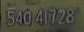

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-46_jpg.rf.f67a58993e81b2788a801a605c0b56a8.jpg
Img number:  83

Result:  '540 4l7 28
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-44_jpg.rf.1e6fb6b338a5220694ccb9af56a1faae2.jpg
Img number:  84

Result:  518 78578
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-44_jpg.rf.1e6fb6b338a5220694ccb9af56a1faae.jpg
Img number:  85

Result:  (57193007
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-46_jpg.rf.f67a58993e81b2788a801a605c0b56a82.jpg
Img number:  86

Result:  (57402007
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-43_jpg.rf.c2b14f92865b541dd794bac58f76de17.jpg
Img number:  87

Result:  (57193907
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-47_jpg.rf.2efd069de8221b96a55e17b708ac0351.jpg
Img number:  88

Result:  05731007 
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-45_jpg.rf.2326cf8113268659962397b7cfd6f9342.jpg
Img number:  89

Result:  5S
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-45_jpg.rf.717e22bb95303d0f71fc9a71e8f43aa2.jpg
Img number:  90

Result:  hy
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-44_jpg.rf.fee49c2b6867b91798c769a405d8492e2.jpg
Img number:  91

Result:  [55 11575
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-42_jpg.rf.bcc6ffb94a9c2aeb7384dc82e34ea8042.jpg
Img number:  92

Result:  518 T151J
Correctness percentage: 25


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-48_jpg.rf.6f6fcb0b5a1d3d8ed9815fff8c7f5eb72.jpg
Img number:  93
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-46_jpg.rf.fcdc6ac11d1a681a81bb3c7846061b80.jpg
Img number:  94
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-47_jpg.rf.e5d4b922f0f67c7420ebbaaa03dc964a2.jpg
Img number:  95
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-47_jpg.rf.2efd069de8221b96a55e17b708ac03512.jpg
Img number:  96
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-43_jpg.rf.481232446f2c2277a1e271eee0c065252.jpg
Img number:  97

Result:  57578578
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-44_jpg.rf.6928834797589a40cea8b8ad5829bd0d2.jpg
Img number:  98

Result:  578 71578
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-42_jpg.rf.a4084d51303de5cd67b17909a9d229062.jpg
Img number:  99

Result:  167471670
Correctness percentage: 25


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-44_jpg.rf.6928834797589a40cea8b8ad5829bd0d.jpg
Img number:  100

Result:  (57193007
Correctness percentage: 75


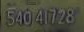

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-46_jpg.rf.5eaa47f98a73fe3c621891b84e1e2dac.jpg
Img number:  101

Result:  '54041728
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-46_jpg.rf.fcdc6ac11d1a681a81bb3c7846061b802.jpg
Img number:  102

Result:  (57192007
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-45_jpg.rf.2326cf8113268659962397b7cfd6f934.jpg
Img number:  103
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-43_jpg.rf.364703993c7299725dc6939ec05e46792.jpg
Img number:  104

Result:  0677958
Correctness percentage: 0.25


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-47_jpg.rf.c96bef7e48c25fa2ea50b99030d110852.jpg
Img number:  105
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-45_jpg.rf.f2426088736e5f0709aa4cf01b5e690b2.jpg
Img number:  106

Result:  5155}
Correctness percentage: 12.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-43_jpg.rf.364703993c7299725dc6939ec05e4679.jpg
Img number:  107
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-45_jpg.rf.717e22bb95303d0f71fc9a71e8f43aa22.jpg
Img number:  108

Result:  5155}
Correctness percentage: 12.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-43_jpg.rf.c2b14f92865b541dd794bac58f76de172.jpg
Img number:  109

Result:  |57578573
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-45_jpg.rf.f2426088736e5f0709aa4cf01b5e690b.jpg
Img number:  110
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-46_jpg.rf.5eaa47f98a73fe3c621891b84e1e2dac2.jpg
Img number:  111

Result:  (57493007
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-44_jpg.rf.fee49c2b6867b91798c769a405d8492e.jpg
Img number:  112

Result:  (571939007
Correctness percentage: 75


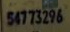

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-56_jpg.rf.288d161f56ccda0444cc60f50e8f5265.jpg
Img number:  113

Result:  (54773296
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-50_jpg.rf.d26b09ce7441ddda43cfd6150c1f511e.jpg
Img number:  114

Result:  5404l26
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-50_jpg.rf.bfa3cbc2d456c5c4cf05e0ed76adcdc9.jpg
Img number:  115

Result:  ExlijAJhka
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-51_jpg.rf.c24180f79ebec16b4527006588e5065c2.jpg
Img number:  116
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-51_jpg.rf.27a6778305b0348508c572f56539847f2.jpg
Img number:  117

Result:  se
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-51_jpg.rf.c24180f79ebec16b4527006588e5065c.jpg
Img number:  118
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-50_jpg.rf.ec4182ef01ee7d648c36dd839a31f734.jpg
Img number:  119

Result:  5404L28.
Correctness percentage: 62.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-50_jpg.rf.ec4182ef01ee7d648c36dd839a31f7342.jpg
Img number:  120
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-48_jpg.rf.b099334ae7ff7bc28763807864d8d7872.jpg
Img number:  121
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-50_jpg.rf.d26b09ce7441ddda43cfd6150c1f511e2.jpg
Img number:  122
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-51_jpg.rf.27a6778305b0348508c572f56539847f.jpg
Img number:  123
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-50_jpg.rf.bfa3cbc2d456c5c4cf05e0ed76adcdc92.jpg
Img number:  124
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-61_jpg.rf.2e25d526f6000c28129b32a5c599aee4.jpg
Img number:  125

Result:  [eu171756
Correctness percentage: 12.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-60_jpg.rf.2b2d5dce18c752b543167b3d1913c09a.jpg
Img number:  126

Result:  514 68666
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-5_jpg.rf.a71533e00747b40f902ebb4088c3086e.jpg
Img number:  127
Correctness percentage: 0


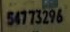

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-56_jpg.rf.fbfa32422dbcd29c099d68b3ad1fa909.jpg
Img number:  128

Result:  654773296
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-5_jpg.rf.a71533e00747b40f902ebb4088c3086e2.jpg
Img number:  129

Result:  36H6?405
Correctness percentage: 50


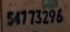

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-56_jpg.rf.c48c478216c3ecc6f3e13b0b07b0b42c.jpg
Img number:  130

Result:  541773296
Correctness percentage: 87.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-5_jpg.rf.1aeeee7bddf50d8d1c04fb84942d8e282.jpg
Img number:  131

Result:  UiI
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-5_jpg.rf.d058d713c2ef556f94859f986275c2f62.jpg
Img number:  132

Result:  36H64d5
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-6_jpg.rf.1483a8436fa2c2377add4db70960b2842.jpg
Img number:  133

Result:  L
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-6_jpg.rf.a5a7ead3ca4422746683b4863c5347252.jpg
Img number:  134

Result:  L
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-6_jpg.rf.6ce6d93ebae5cc5fc293109c166105502.jpg
Img number:  135

Result:  0L94 5
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-71_jpg.rf.fd5ed5126c03d60f51e3d378ec3b19242.jpg
Img number:  136

Result:  '51371862'
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-71_jpg.rf.fc7ae1bc415bcf3240aa791468160cc5.jpg
Img number:  137
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-73_jpg.rf.b06ca6376ff6688c8b2dba24f25b4bc12.jpg
Img number:  138

Result:  "51371062
Correctness percentage: 75


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-7_jpg.rf.47c3537b205edf4b689e1d0e23f12f012.jpg
Img number:  139

Result:  400v405
Correctness percentage: 37.5


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-73_jpg.rf.5719c7e9d74b7c2bf121e66472ac79de2.jpg
Img number:  140

Result:  "50371062'
Correctness percentage: 50


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-7_jpg.rf.c6283e1103ab53985171baea9cfa04b22.jpg
Img number:  141

Result:  La
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-8_jpg.rf.1d426bea5b019e46a28ed6b1dddd6e972.jpg
Img number:  142
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-7_jpg.rf.a0623923cb41320e2a8f95305ae8be972.jpg
Img number:  143

Result:  Li
Correctness percentage: 0


Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_40_13_06_Trim_mp4-8_jpg.rf.61180ee773bfad0b4ee3bc9c21f86d1b2.jpg
Img number:  144
Correctness percentage: 0


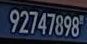

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-11_jpg.rf.8b9edebf5a5dfde4cb9cf8cbb9671054.jpg
Img number:  145

Result:  92747898'
Correctness percentage: 87.5


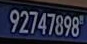

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-11_jpg.rf.86c3270be28469665168183708d5cdf0.jpg
Img number:  146

Result:  92747898'
Correctness percentage: 87.5


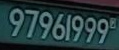

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-130_jpg.rf.09af009dde87c7c67a74a5c6341b520e.jpg
Img number:  147

Result:  979619994
Correctness percentage: 87.5


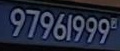

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-130_jpg.rf.8205153f2bd8b0f98dfa40262fcb7af1.jpg
Img number:  148

Result:  97961999:
Correctness percentage: 87.5


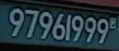

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-130_jpg.rf.ba1cede654eceb30935ef03418021aae.jpg
Img number:  149

Result:  97961999:
Correctness percentage: 87.5


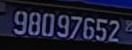

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-141_jpg.rf.649edd0b02204c3378b4101ddd751fe6.jpg
Img number:  150

Result:  '98097652
Correctness percentage: 87.5


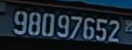

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-141_jpg.rf.365b796c6498735415c3b211a96a14a6.jpg
Img number:  151

Result:  '98097652
Correctness percentage: 87.5


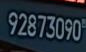

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-134_jpg.rf.6c0b9dee4b3b756b55932eecc95e946f.jpg
Img number:  152

Result:  92873090'
Correctness percentage: 87.5


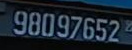

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-141_jpg.rf.96816a7609c6f0dc9746e92aafdd8698.jpg
Img number:  153

Result:  '98097652
Correctness percentage: 87.5


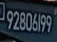

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-151_jpg.rf.3981d4ac95b6eea4cbb24470e7f315bb.jpg
Img number:  154

Result:  Jgze085p |
Correctness percentage: 0


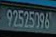

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-146_jpg.rf.afc85d35fdb8954698d1f6f5d11f5126.jpg
Img number:  155

Result:  '92625798
Correctness percentage: 50


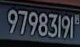

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-165_jpg.rf.c85eb47017f6b8ea2482c2b440f263d2.jpg
Img number:  156

Result:  97983191"'
Correctness percentage: 75


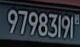

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-165_jpg.rf.2b973b19e38a662e52f54d7f4435b0e3.jpg
Img number:  157

Result:  97983151"'
Correctness percentage: 62.5


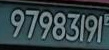

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-166_jpg.rf.2b452eb96aabdc2f5ee8fa2f29f359d8.jpg
Img number:  158

Result:  97983191
Correctness percentage: 100


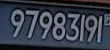

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-166_jpg.rf.9755683d0299cba640217bc2ad1e366d.jpg
Img number:  159

Result:  97983191
Correctness percentage: 100


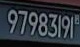

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-165_jpg.rf.fd9a55d818ad79edaf23e91ebcd86553.jpg
Img number:  160

Result:  97983151"
Correctness percentage: 75


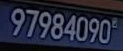

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-17_jpg.rf.cf6ee95ddd8865a4d893e889c5214483.jpg
Img number:  161

Result:  97984090"
Correctness percentage: 87.5


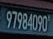

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-16_jpg.rf.1afe6fa9ef0fa89d871cc772479f83bd.jpg
Img number:  162

Result:  "9798403"|
Correctness percentage: 50


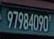

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-16_jpg.rf.56723ddc61b3b6f4719bfd977613387a.jpg
Img number:  163

Result:  '9798403"
Correctness percentage: 62.5


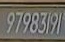

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-168_jpg.rf.d3476a5614e772fd38bd3044f1cb2b67.jpg
Img number:  164

Result:  97983191
Correctness percentage: 100


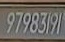

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-168_jpg.rf.e7edeece88f9da2f5be00a1d3a821a31.jpg
Img number:  165

Result:  97983191
Correctness percentage: 100


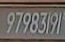

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-168_jpg.rf.418c92d11309ef988d7a506b62bd2528.jpg
Img number:  166

Result:  97983191
Correctness percentage: 100


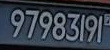

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-166_jpg.rf.c55d324f77c9f51b52deb9e9fccc0569.jpg
Img number:  167

Result:  97983191
Correctness percentage: 100


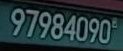

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-17_jpg.rf.592b570bc6dae912488c8fa2f70af8ab.jpg
Img number:  168

Result:  97984090'
Correctness percentage: 87.5


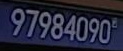

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-17_jpg.rf.1d9bc8f6281153bbc041c7015294d909.jpg
Img number:  169

Result:  97984090'
Correctness percentage: 87.5


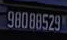

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-27_jpg.rf.b331a4c462a0e057a3453508fbd702ac.jpg
Img number:  170

Result:  "90000529
Correctness percentage: 50


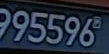

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-34_jpg.rf.a422e82da48bc20917cccfb2c324d735.jpg
Img number:  171

Result:  295596
Correctness percentage: 83.3


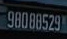

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-27_jpg.rf.e9353ae6a45ed27b4837c5addb179f2a.jpg
Img number:  172

Result:  "90000529
Correctness percentage: 50


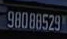

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-27_jpg.rf.56419c604358f756541a8a6c2c342f00.jpg
Img number:  173

Result:  "90000529
Correctness percentage: 50


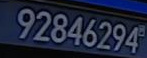

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-45_jpg.rf.f3e69cdedfcc6d36eb67b963e2837335.jpg
Img number:  174

Result:  92846294]
Correctness percentage: 87.5


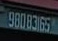

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-49_jpg.rf.e88a824d50f2fa9afa9ad02ce3c52169.jpg
Img number:  175

Result:  L9o065a
Correctness percentage: 12.5


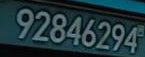

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-45_jpg.rf.b7c9e529ed26f280c95a03f42d00d9cf.jpg
Img number:  176

Result:  92846294]
Correctness percentage: 87.5


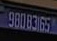

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-49_jpg.rf.7e219a6787f333a2c50fda54e3494282.jpg
Img number:  177

Result:  '9Q0u65_
Correctness percentage: 12.5


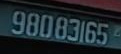

Path:  /content/drive/MyDrive/crops-wagon/crops_wagon_best/Desktop-2022_04_01---16_55_36_07_mp4-50_jpg.rf.e06e948f9f41ac0b1280a6c1ca7c545b.jpg
Img number:  178

Result:  '90003165 
Correctness percentage: 62.5


In [ ]:
# import os
arr = glob("/content/drive/MyDrive/crops-wagon/crops_wagon_best/*.jpg")


with open ("/content/drive/MyDrive/crops-wagon/accuracy_2.txt", "w") as file:
  i =1
  for img in arr:
    img_cv = cv2.imread(img)
    cv2_imshow(img_cv)

    pil_img = Image.open(img)

    
    reader = easyocr.Reader(['en'])
    result = reader.readtext(pil_img, detail=1)
    print("Path: ", img)
    print("Img number: ", i)

    if result != []:  
      detect_out = result[0][1]
      print("\nResult: ", detect_out)
    correct = input("Correctness percentage: ")
    file_str =str(i)+' '+ img + " :: " + correct + "%"
    file.write(file_str + "\n")
    i+=1

